In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [2]:
print('Image Data shape',digits.data.shape)
print('Label Data shape',digits.target.shape)

Image Data shape (1797, 64)
Label Data shape (1797,)


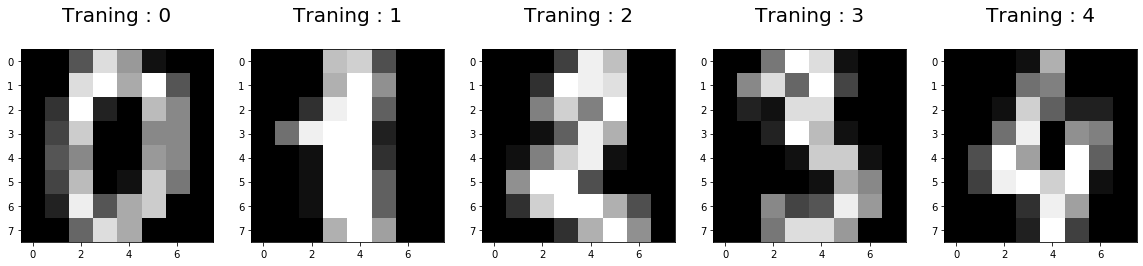

In [3]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index + 1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Traning : %i\n' %label,fontsize=20)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [5]:
print(X_train.shape)

(1383, 64)


In [6]:
print(y_train.shape)

(1383,)


In [9]:
print(X_test.shape)

(414, 64)


In [10]:
print(y_test.shape)

(414,)


In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logr = LogisticRegression()
logr.fit(X_train,y_train)

/Users/Danai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Danai/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
print(logr.predict(X_test[0].reshape(1,-1)))

[4]


In [15]:
print(logr.predict(X_test[0:10]))

[4 0 9 1 8 7 1 5 1 6]


In [16]:
predictions = logr.predict(X_test)

In [18]:
score = logr.score(X_test,y_test)
print(score)

0.9420289855072463


In [19]:
cm = metrics.confusion_matrix(y_test,predictions)
print (cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


Text(0.5, 1, 'Accuracy Score : 0.9420289855072463')

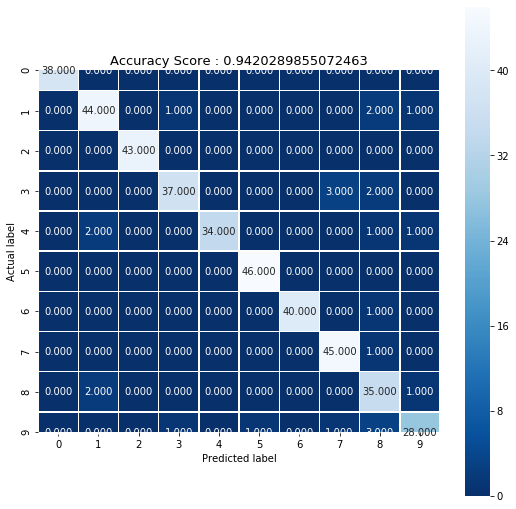

In [24]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidth=0.5,square = True,cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score : {0}'.format(score)
plt.title(all_sample_title,size=13)

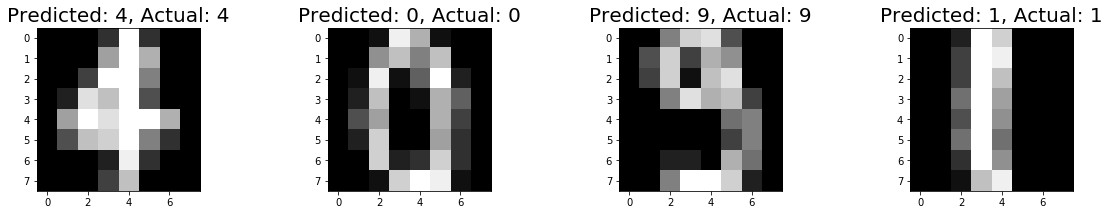

In [30]:
index = 0
classifiedIndex = []
for predict,actual in zip(predictions,y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20,3))
for plotIndex,wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex +1)
    plt.imshow(np.reshape(X_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong],y_test[wrong]),fontsize=20)